<a href="https://colab.research.google.com/github/shivranjan09/carpricepredicitionintershipproject/blob/main/car_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data = pd.read_csv(r'car.csv')

In [ ]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
data = data.drop(['Car_Name'], axis=1)

In [ ]:
data['current_year'] = 2020
data['no_year'] = data['current_year'] - data['Year']

In [ ]:
data = data.drop(['Year','current_year'],axis = 1)

In [ ]:
data = pd.get_dummies(data,drop_first=True)

In [ ]:
data = data[['Selling_Price','Present_Price','Kms_Driven','no_year','Owner','Fuel_Type_Diesel','Fuel_Type_Petrol','Seller_Type_Individual','Transmission_Manual']]

In [ ]:
data

,Selling_Price,Present_Price,Kms_Driven,no_year,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,6,0,0,1,0,1
1,4.75,9.54,43000,7,0,1,0,0,1
2,7.25,9.85,6900,3,0,0,1,0,1
3,2.85,4.15,5200,9,0,0,1,0,1
4,4.60,6.87,42450,6,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,4,0,1,0,0,1
297,4.00,5.90,60000,5,0,0,1,0,1
298,3.35,11.00,87934,11,0,0,1,0,1
299,11.50,12.50,9000,3,0,1,0,0,1


In [ ]:
data.corr()

,Selling_Price,Present_Price,Kms_Driven,no_year,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.236141,-0.088344,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.047584,0.008057,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.524342,0.089216,0.172515,-0.172874,-0.101419,-0.162510
no_year,-0.236141,0.047584,0.524342,1.000000,0.182104,-0.064315,0.059959,0.039896,-0.000394
Owner,-0.088344,0.008057,0.089216,0.182104,1.000000,-0.053469,0.055687,0.124269,-0.050316
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.064315,-0.053469,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.059959,0.055687,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.039896,0.124269,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.000394,-0.050316,-0.098643,0.091013,0.063240,1.000000


In [ ]:
x = data.iloc[:,1:]
y = data.iloc[:,0]

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(x,y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [ ]:
model.feature_importances_

array([0.37980496, 0.04095093, 0.07933433, 0.00090397, 0.22156151,
       0.01339102, 0.13252973, 0.13152355])

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(x,y,random_state=0,test_size=0.2)

In [ ]:

n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200,num = 12)]
max_features = ['auto','sqrt']
max_depth = [int(x) for x in np.linspace(5,30,num = 6)]
min_samples_split = [2,5,10,15,100]
min_samples_leaf  = [1,2,5,10]

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
grid = {'n_estimators': n_estimators,
        'max_features': max_features,
        'max_depth': max_depth,
        'min_samples_split': min_samples_split,
       'min_samples_leaf': min_samples_leaf}
print(grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

hyp = RandomizedSearchCV(estimator = model,param_distributions=grid,
    n_iter=10,
    scoring= 'neg_mean_squared_error',
    cv=5,verbose = 2, random_state = 42,n_jobs = 1)

In [ ]:
hyp.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.2s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.2s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.1s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.2s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.2s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   1.5s
[CV] n_estimators=1100, min_samples_split=10, mi

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   56.2s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [ ]:
y_pred = hyp.predict(x_test)

In [ ]:
y_pred

array([ 7.02942989,  0.52726925,  4.9298048 ,  8.38322939, 12.52647376,
        5.24706655,  3.35258752,  0.42705215,  3.91068108,  5.00582071,
        2.84654698,  0.65797799,  5.06873325,  7.28368068,  7.47771197,
       12.76313775,  7.03648371,  4.19157218,  0.48822299,  1.30642956,
        3.23034247,  5.1704475 ,  5.34812012, 10.4117586 ,  0.23848526,
        0.68528315,  0.33498362,  0.68089374,  0.51284283,  4.97300289,
        2.84431756,  5.92469424,  0.52043824,  7.11672085,  3.36761397,
        1.14974282,  5.7431539 ,  5.44224096,  0.25445625,  8.00402318,
        7.62353936, 21.87849767,  5.05474427,  4.52637517,  5.60031826,
       10.37601967,  0.25379762,  0.74536057,  5.33347702,  6.79865526,
        6.85634813,  2.95910629,  5.2600422 , 21.88537663,  1.14974282,
        1.14974282,  0.41602005,  2.75837536,  3.63674699,  2.53053478,
        4.70420216])

In [ ]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


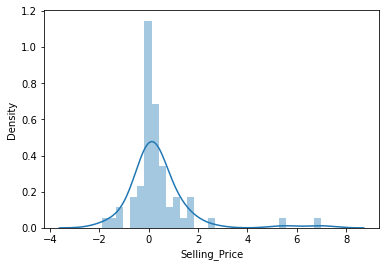

In [ ]:
sns.distplot(y_test-y_pred)

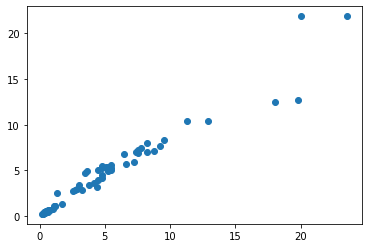

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred)

In [ ]:
import pickle
file = open('file.pkl','wb')

pickle.dump(hyp,file)